In [1]:
#from google.colab import files
#uploaded = files.upload()

Saving heart.dat to heart.dat


In [2]:
#importing the required libraried to clean and perform EDA on the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [3]:
#adding the column names to the dataset.
column_names = [
    "age",
    "gender",
    "chest_pain",
    "resting_BP ",
    "serum_cholestoral",
    "fasting_blood_sugar",
    "resting_ecg",
    "max_heart_rate",
    "exercise_angina",
    "oldpeak",
    "slope",
    "num_major_vessels",
    "thal",
    "target"
]

In [4]:
#reading the heart disease dataset to a dataframe.
heart_data = pd.read_csv(io.BytesIO(uploaded['heart.dat']), delim_whitespace=True, header=None, names= column_names)
display(heart_data.head())


<ipython-input-4-1638599759>:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  heart_data = pd.read_csv(io.BytesIO(uploaded['heart.dat']), delim_whitespace=True, header=None, names= column_names)


,age,gender,chest_pain,resting_BP,serum_cholestoral,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,slope,num_major_vessels,thal,target
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


In [5]:
print("\nthe dimensions of the dataset is:\n")
print(heart_data.shape)

print("\nthe overview of columns present in dataset\n")
print(heart_data.info())

print("\nChecking the distribution of the numerical values in the dataset\n")
print(heart_data.describe())


the dimensions of the dataset is:

(270, 14)

the overview of columns present in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  270 non-null    float64
 1   gender               270 non-null    float64
 2   chest_pain           270 non-null    float64
 3   resting_BP           270 non-null    float64
 4   serum_cholestoral    270 non-null    float64
 5   fasting_blood_sugar  270 non-null    float64
 6   resting_ecg          270 non-null    float64
 7   max_heart_rate       270 non-null    float64
 8   exercise_angina      270 non-null    float64
 9   oldpeak              270 non-null    float64
 10  slope                270 non-null    float64
 11  num_major_vessels    270 non-null    float64
 12  thal                 270 non-null    float64
 13  target               270 non-null    int64  
dtyp

In [6]:
#checking for NULL values.
heart_data.isnull().sum()

,0
age,0
gender,0
chest_pain,0
resting_BP,0
serum_cholestoral,0
fasting_blood_sugar,0
resting_ecg,0
max_heart_rate,0
exercise_angina,0
oldpeak,0


# **UNIVARIATE ANALYSIS.**

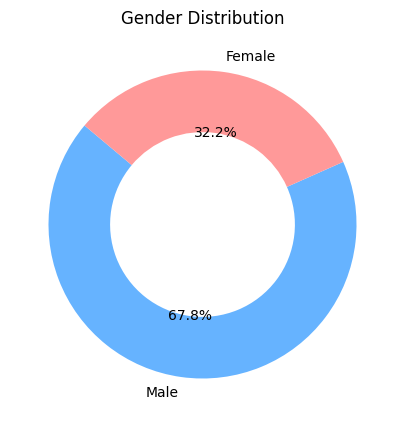

In [7]:
#doughnut plot to show the distribution of the gender in the dataset.
gender_counts = heart_data['gender'].value_counts()
labels = ['Male', 'Female']
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'width': 0.4})
plt.title('Gender Distribution')
plt.show()

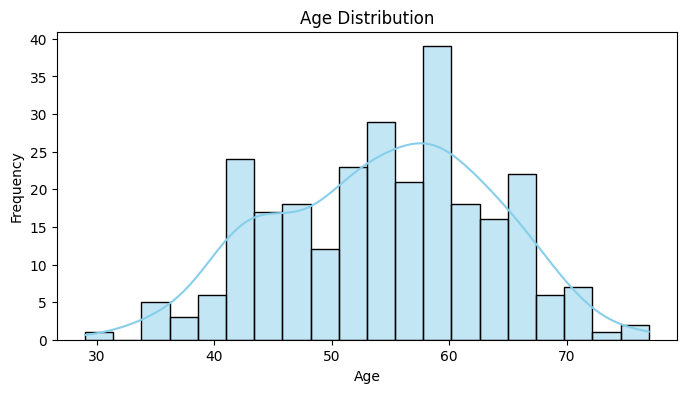

In [8]:
#checking the distribution of age
plt.figure(figsize=(8, 4))
sns.histplot(heart_data['age'], kde=True, color='skyblue', bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<ipython-input-9-3957644468>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='chest_pain', data=heart_data, palette='Set2')


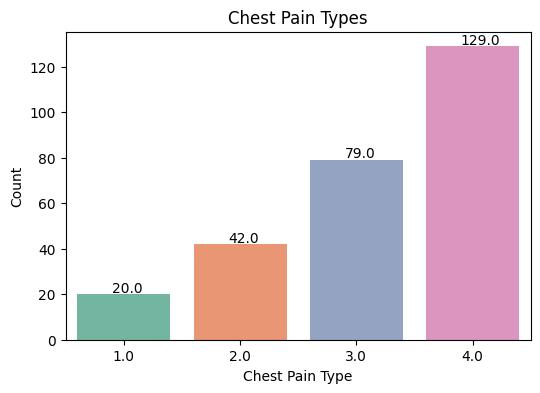

In [9]:
#chest_pain Types
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='chest_pain', data=heart_data, palette='Set2')
plt.title('Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')

# Add annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x()+0.3, p.get_height()+1))

plt.show()

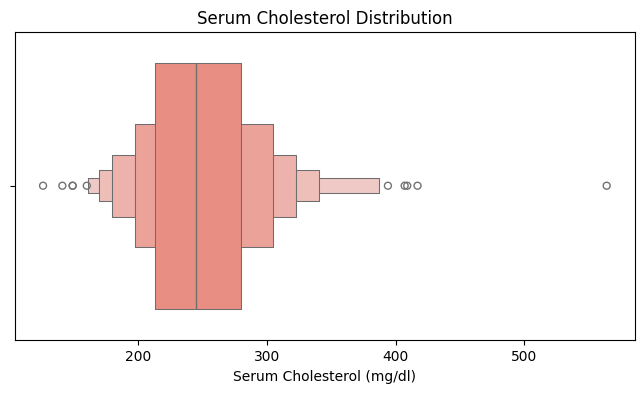

In [10]:
#Serum Cholestrol Distribution
plt.figure(figsize=(8, 4))
sns.boxenplot(x=heart_data['serum_cholestoral'], color='salmon')
plt.title('Serum Cholesterol Distribution')
plt.xlabel('Serum Cholesterol (mg/dl)')
plt.show()

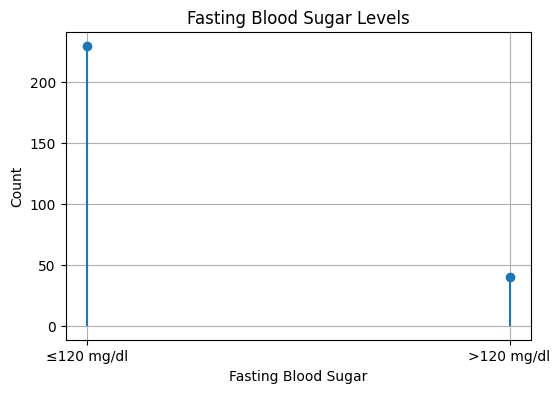

In [11]:
#fasting_bloodsugar
fbs_counts = heart_data['fasting_blood_sugar'].value_counts().sort_index()
plt.figure(figsize=(6, 4))
# Removed the deprecated 'use_line_collection' argument
plt.stem(fbs_counts.index, fbs_counts.values, basefmt=" ")
plt.xticks([0, 1], ['≤120 mg/dl', '>120 mg/dl'])
plt.title('Fasting Blood Sugar Levels')
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Count')
plt.grid(True)
plt.show()

<ipython-input-12-3834710484>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='resting_ecg', data=heart_data, jitter=True, palette='cool', size=6)


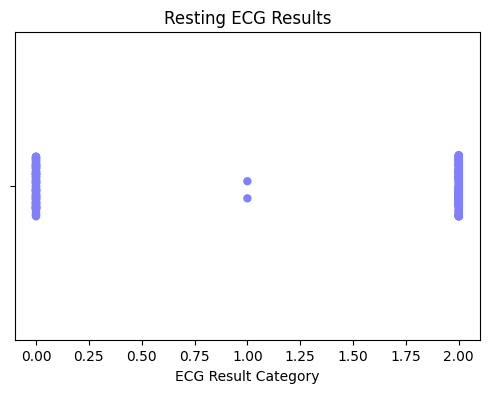

In [12]:
#resting_ecg
plt.figure(figsize=(6, 4))
sns.stripplot(x='resting_ecg', data=heart_data, jitter=True, palette='cool', size=6)
plt.title('Resting ECG Results')
plt.xlabel('ECG Result Category')
plt.show()

<ipython-input-13-2651360449>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(heart_data['max_heart_rate'], shade=True, color='green')


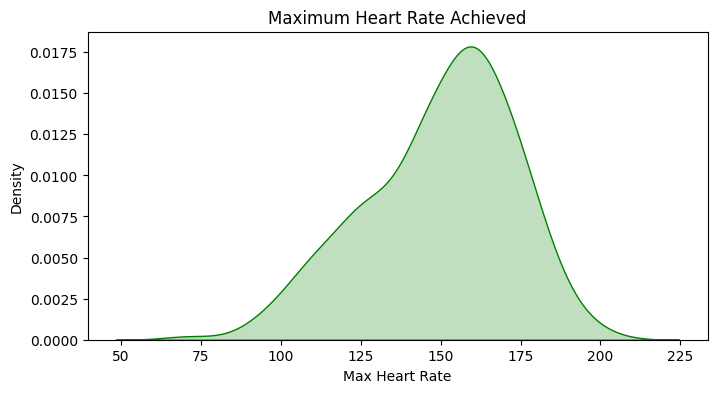

In [13]:
#max_heart_rate
plt.figure(figsize=(8, 4))
sns.kdeplot(heart_data['max_heart_rate'], shade=True, color='green')
plt.title('Maximum Heart Rate Achieved')
plt.xlabel('Max Heart Rate')
plt.show()

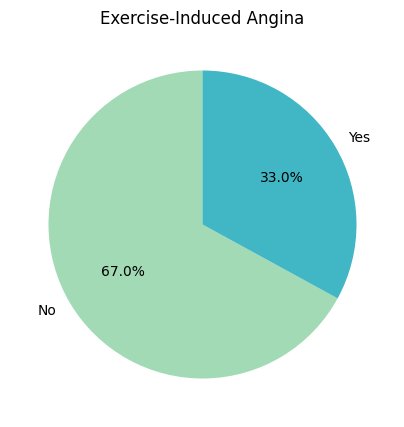

In [14]:
#exercise_induced_angia
labels = ['No', 'Yes']
values = heart_data['exercise_angina'].value_counts().sort_index()
colors = ['#a1dab4', '#41b6c4']

plt.figure(figsize=(5, 5))
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Exercise-Induced Angina')
plt.show()

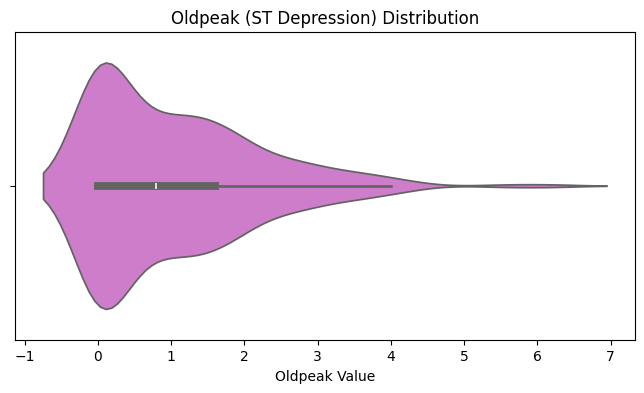

In [15]:
#oldpeak_distribution
plt.figure(figsize=(8, 4))
sns.violinplot(x=heart_data['oldpeak'], color='orchid')
plt.title('Oldpeak (ST Depression) Distribution')
plt.xlabel('Oldpeak Value')
plt.show()

<ipython-input-16-2066208742>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=slope_counts.values, y=labels, palette='Blues_r')


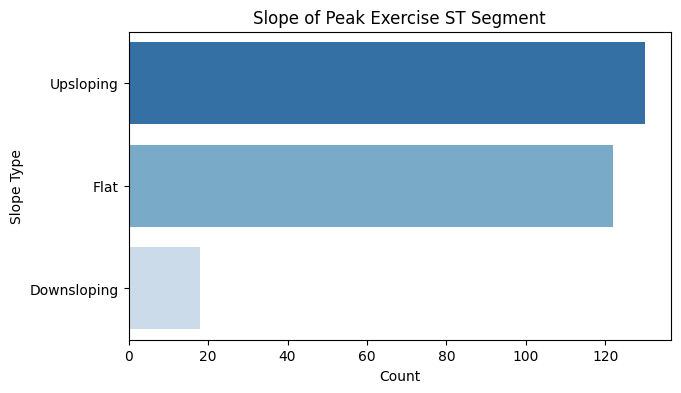

In [16]:
#slope_distribution
slope_counts = heart_data['slope'].value_counts().sort_index()
labels = ['Upsloping', 'Flat', 'Downsloping']

plt.figure(figsize=(7, 4))
sns.barplot(x=slope_counts.values, y=labels, palette='Blues_r')
plt.title('Slope of Peak Exercise ST Segment')
plt.xlabel('Count')
plt.ylabel('Slope Type')
plt.show()

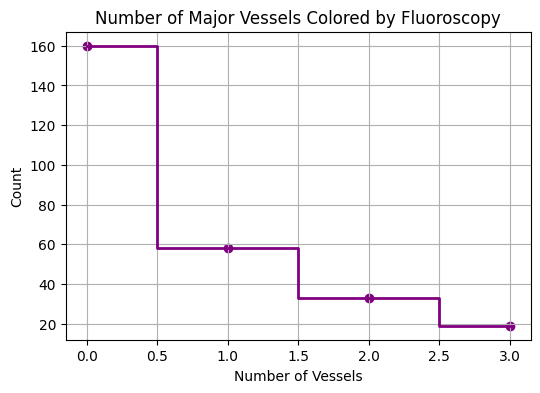

In [17]:
vessel_counts = heart_data['num_major_vessels'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
plt.step(vessel_counts.index, vessel_counts.values, where='mid', linewidth=2, color='purple')
plt.scatter(vessel_counts.index, vessel_counts.values, color='purple')
plt.title('Number of Major Vessels Colored by Fluoroscopy')
plt.xlabel('Number of Vessels')
plt.ylabel('Count')
plt.grid(True)
plt.show()

<ipython-input-18-3262565683>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='thal', data=heart_data, palette='pastel')


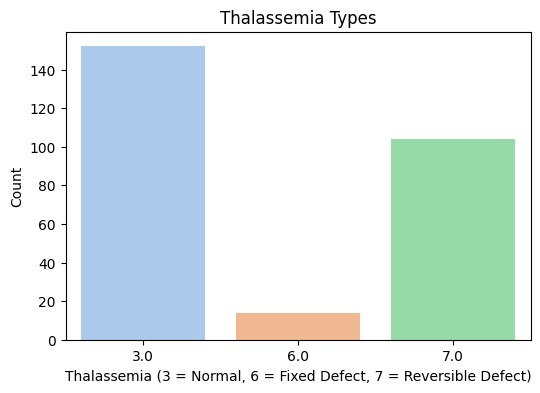

In [18]:
#thalassemia
plt.figure(figsize=(6, 4))
sns.countplot(x='thal', data=heart_data, palette='pastel')
plt.title('Thalassemia Types')
plt.xlabel('Thalassemia (3 = Normal, 6 = Fixed Defect, 7 = Reversible Defect)')
plt.ylabel('Count')
plt.show()

# **BI-Variate Analysis**

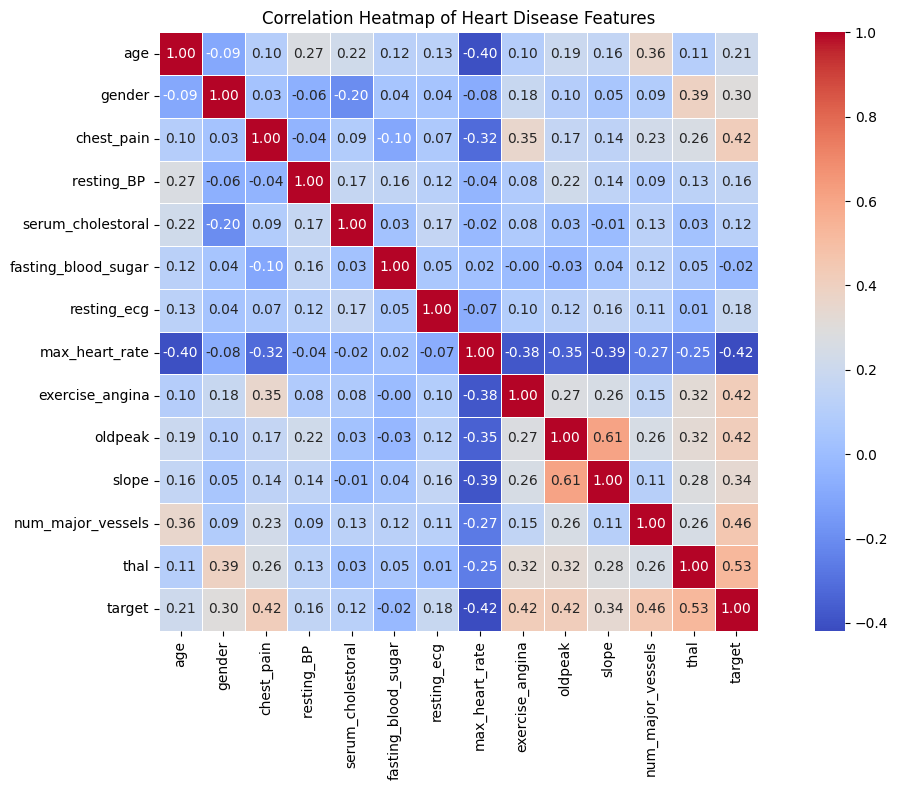

In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(heart_data.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title("Correlation Heatmap of Heart Disease Features")
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

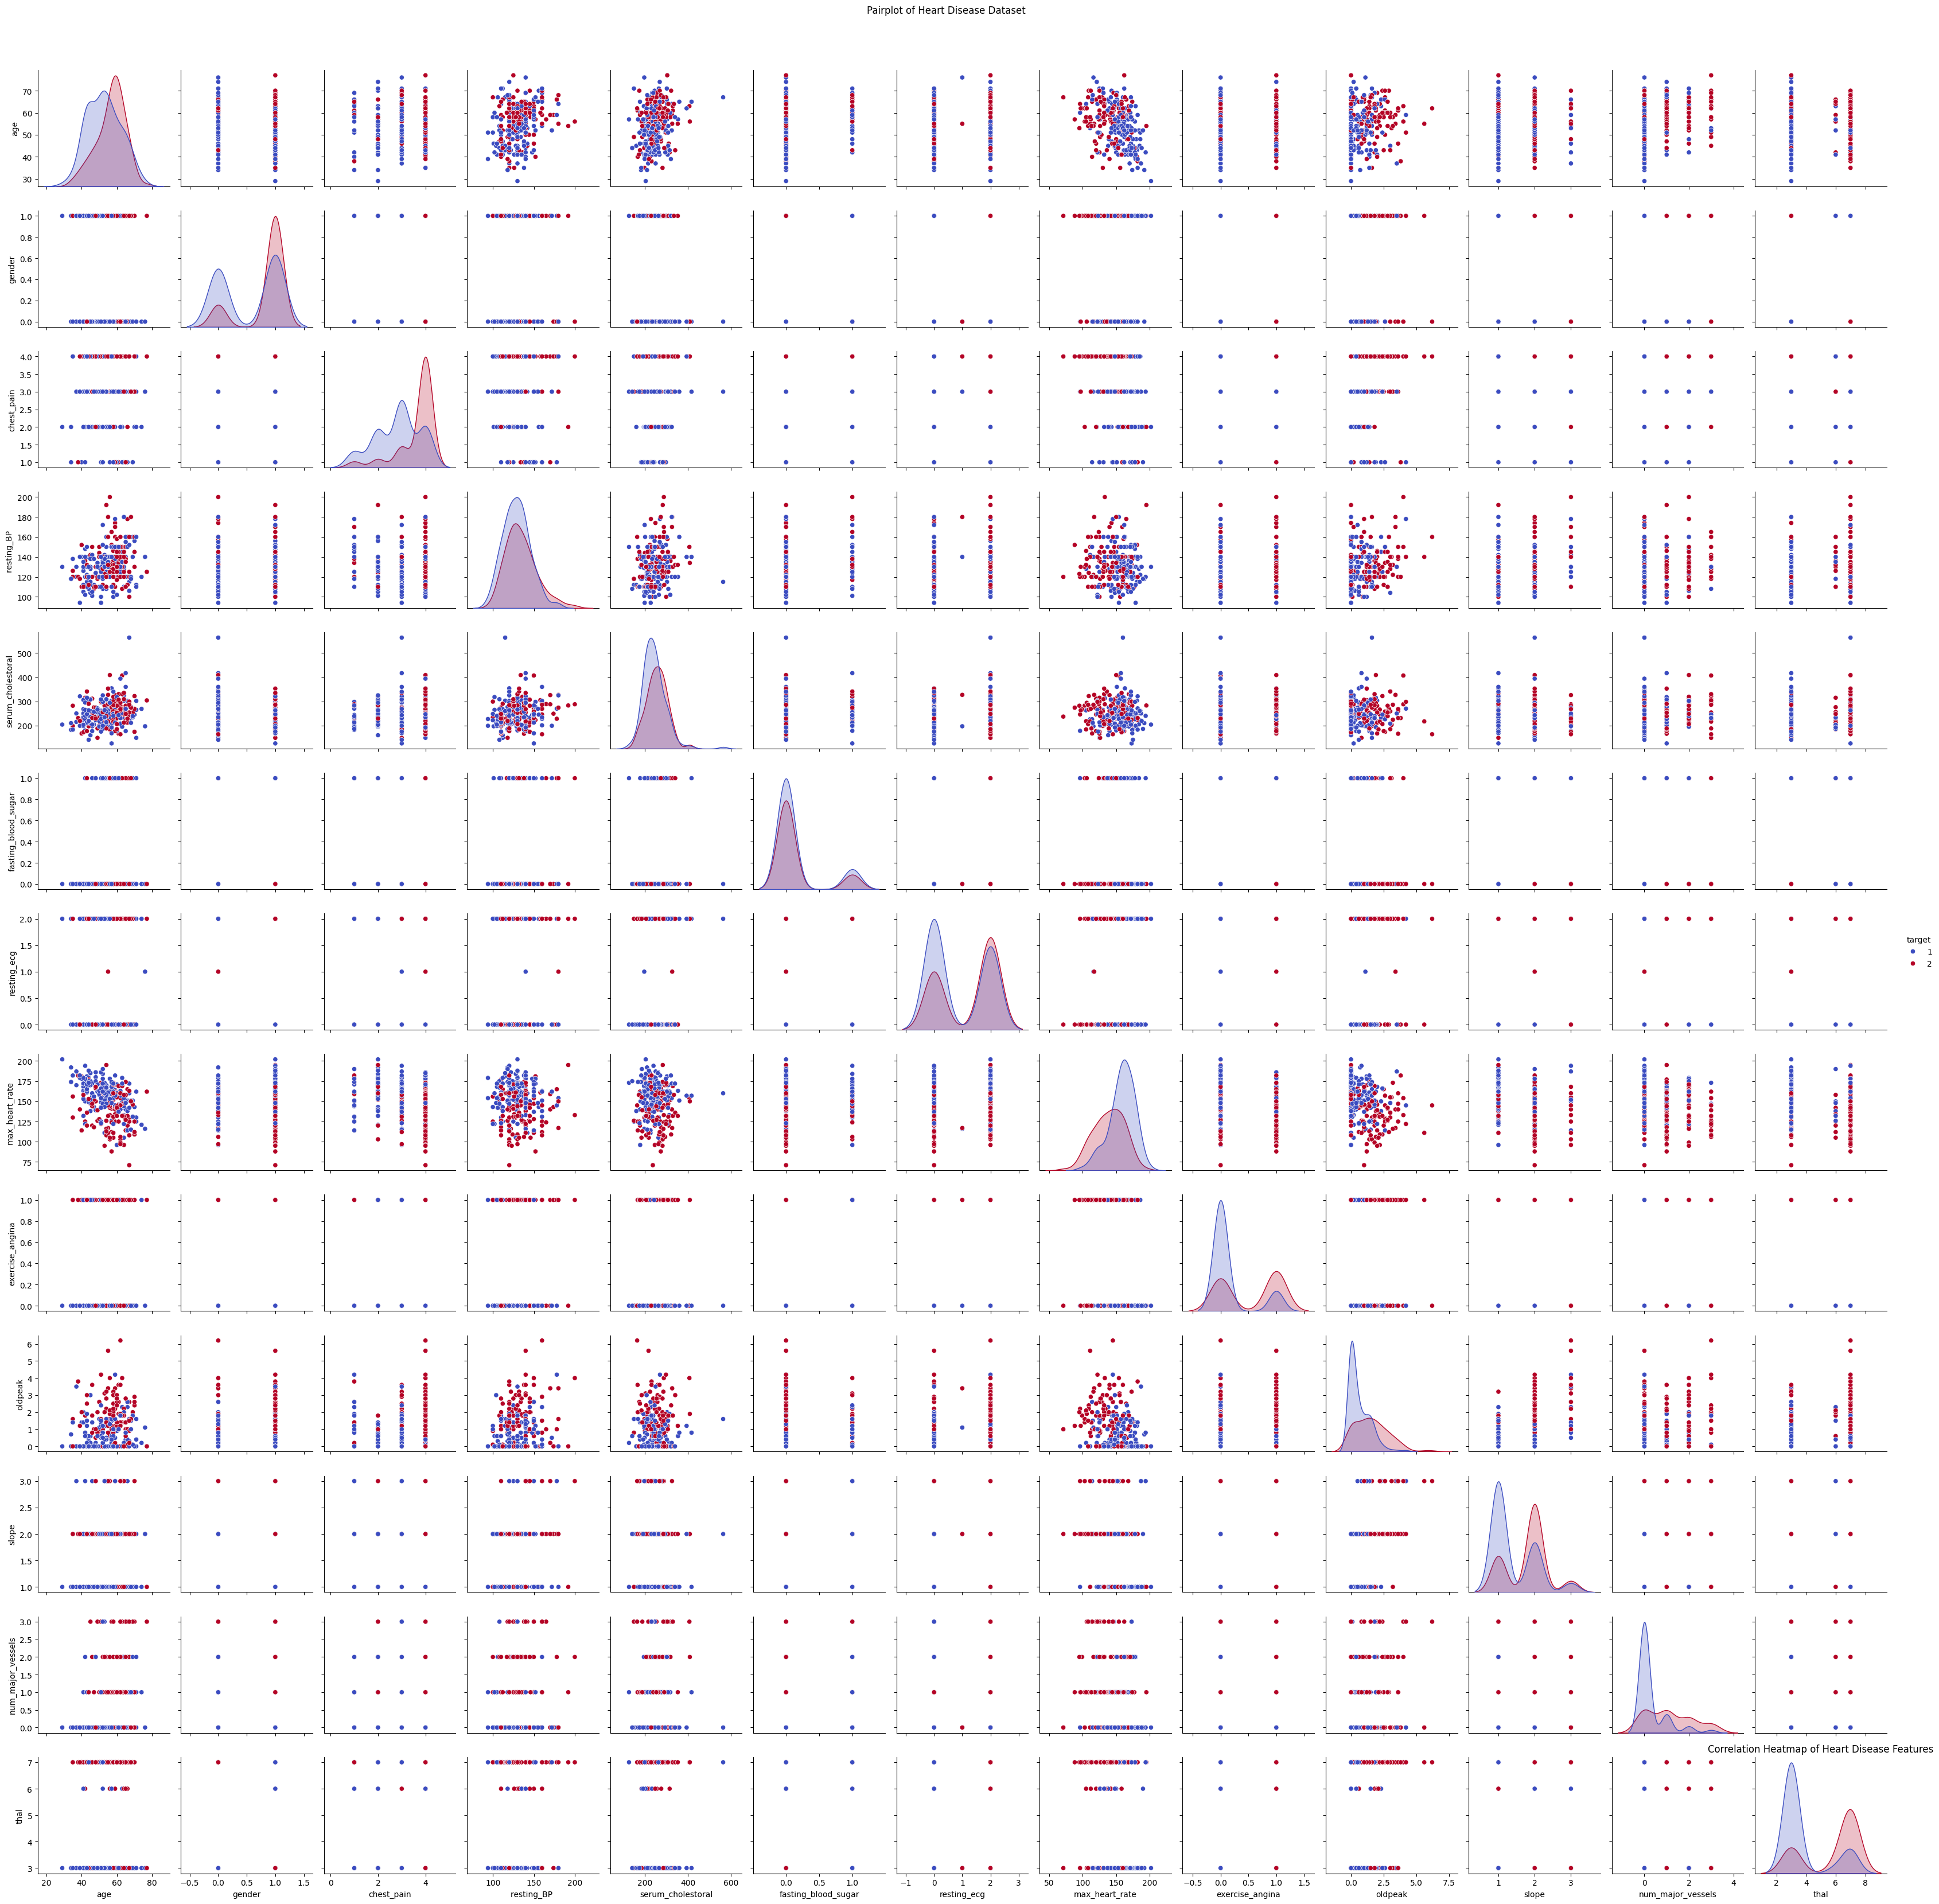

In [28]:
plt.figure(figsize=(12, 8))
sns.pairplot(heart_data, hue='target', palette='coolwarm')
plt.suptitle("Pairplot of Heart Disease Dataset", y=1.02)
plt.title("Correlation Heatmap of Heart Disease Features")
plt.tight_layout()
plt.show()